In [4]:
import os
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
%matplotlib inline

In [8]:
# Reads the .csv file into variable df
df = pd.read_csv('data/iris.csv')

# Separates the class variable in y
y = df.species

# Removes the y column from df
df = df.drop('species', axis=1)

# Standardizes df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

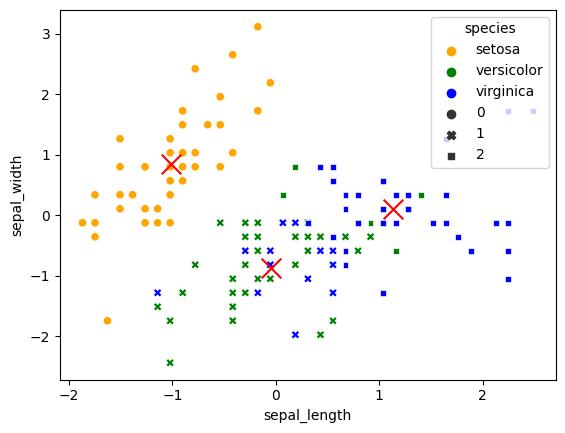

In [10]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=df, 
    hue=y,
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')